# Inference Tutorial
First, we have to import the dependencies needed and initialize the detector as well as the post-processing pipeline.

In [1]:
from PIL import Image
import numpy as np
import sys
sys.path.append('..')

import src.layoutparser.models.detectron2.layoutmodel as lp
import src.layoutparser.visualization as viz
import src.layoutparser.ocr.tesseract_agent as tes

from seg_post_process.post_segmentation import PostProcessingSegmentation

The model and its config can be downloaded from https://drive.google.com/drive/folders/15KNAPItTzDQwu-t5clvVq3b_JmhEI7th?usp=sharing

In [2]:
model = lp.Detectron2LayoutModel(
            config_path = '../3_class_model/config.yaml',
            model_path  = '../3_class_model/model_final.pth',
            label_map   = {1:"Paragraph", 2:"OtherText", 3:"Visual"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )
    
ocr_agent = tes.TesseractAgent(languages='eng') 

In [3]:
im = Image.open('../Images/00000625.tif')

layout = model.detect(im)

masks = model.masks(im)

/home/georgi006/anaconda3/envs/inference/lib/python3.10/site-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/georgi006/anaconda3/envs/inference/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
post = PostProcessingSegmentation(layout, im, masks)

In [5]:
image, boxes = post.pipeline()

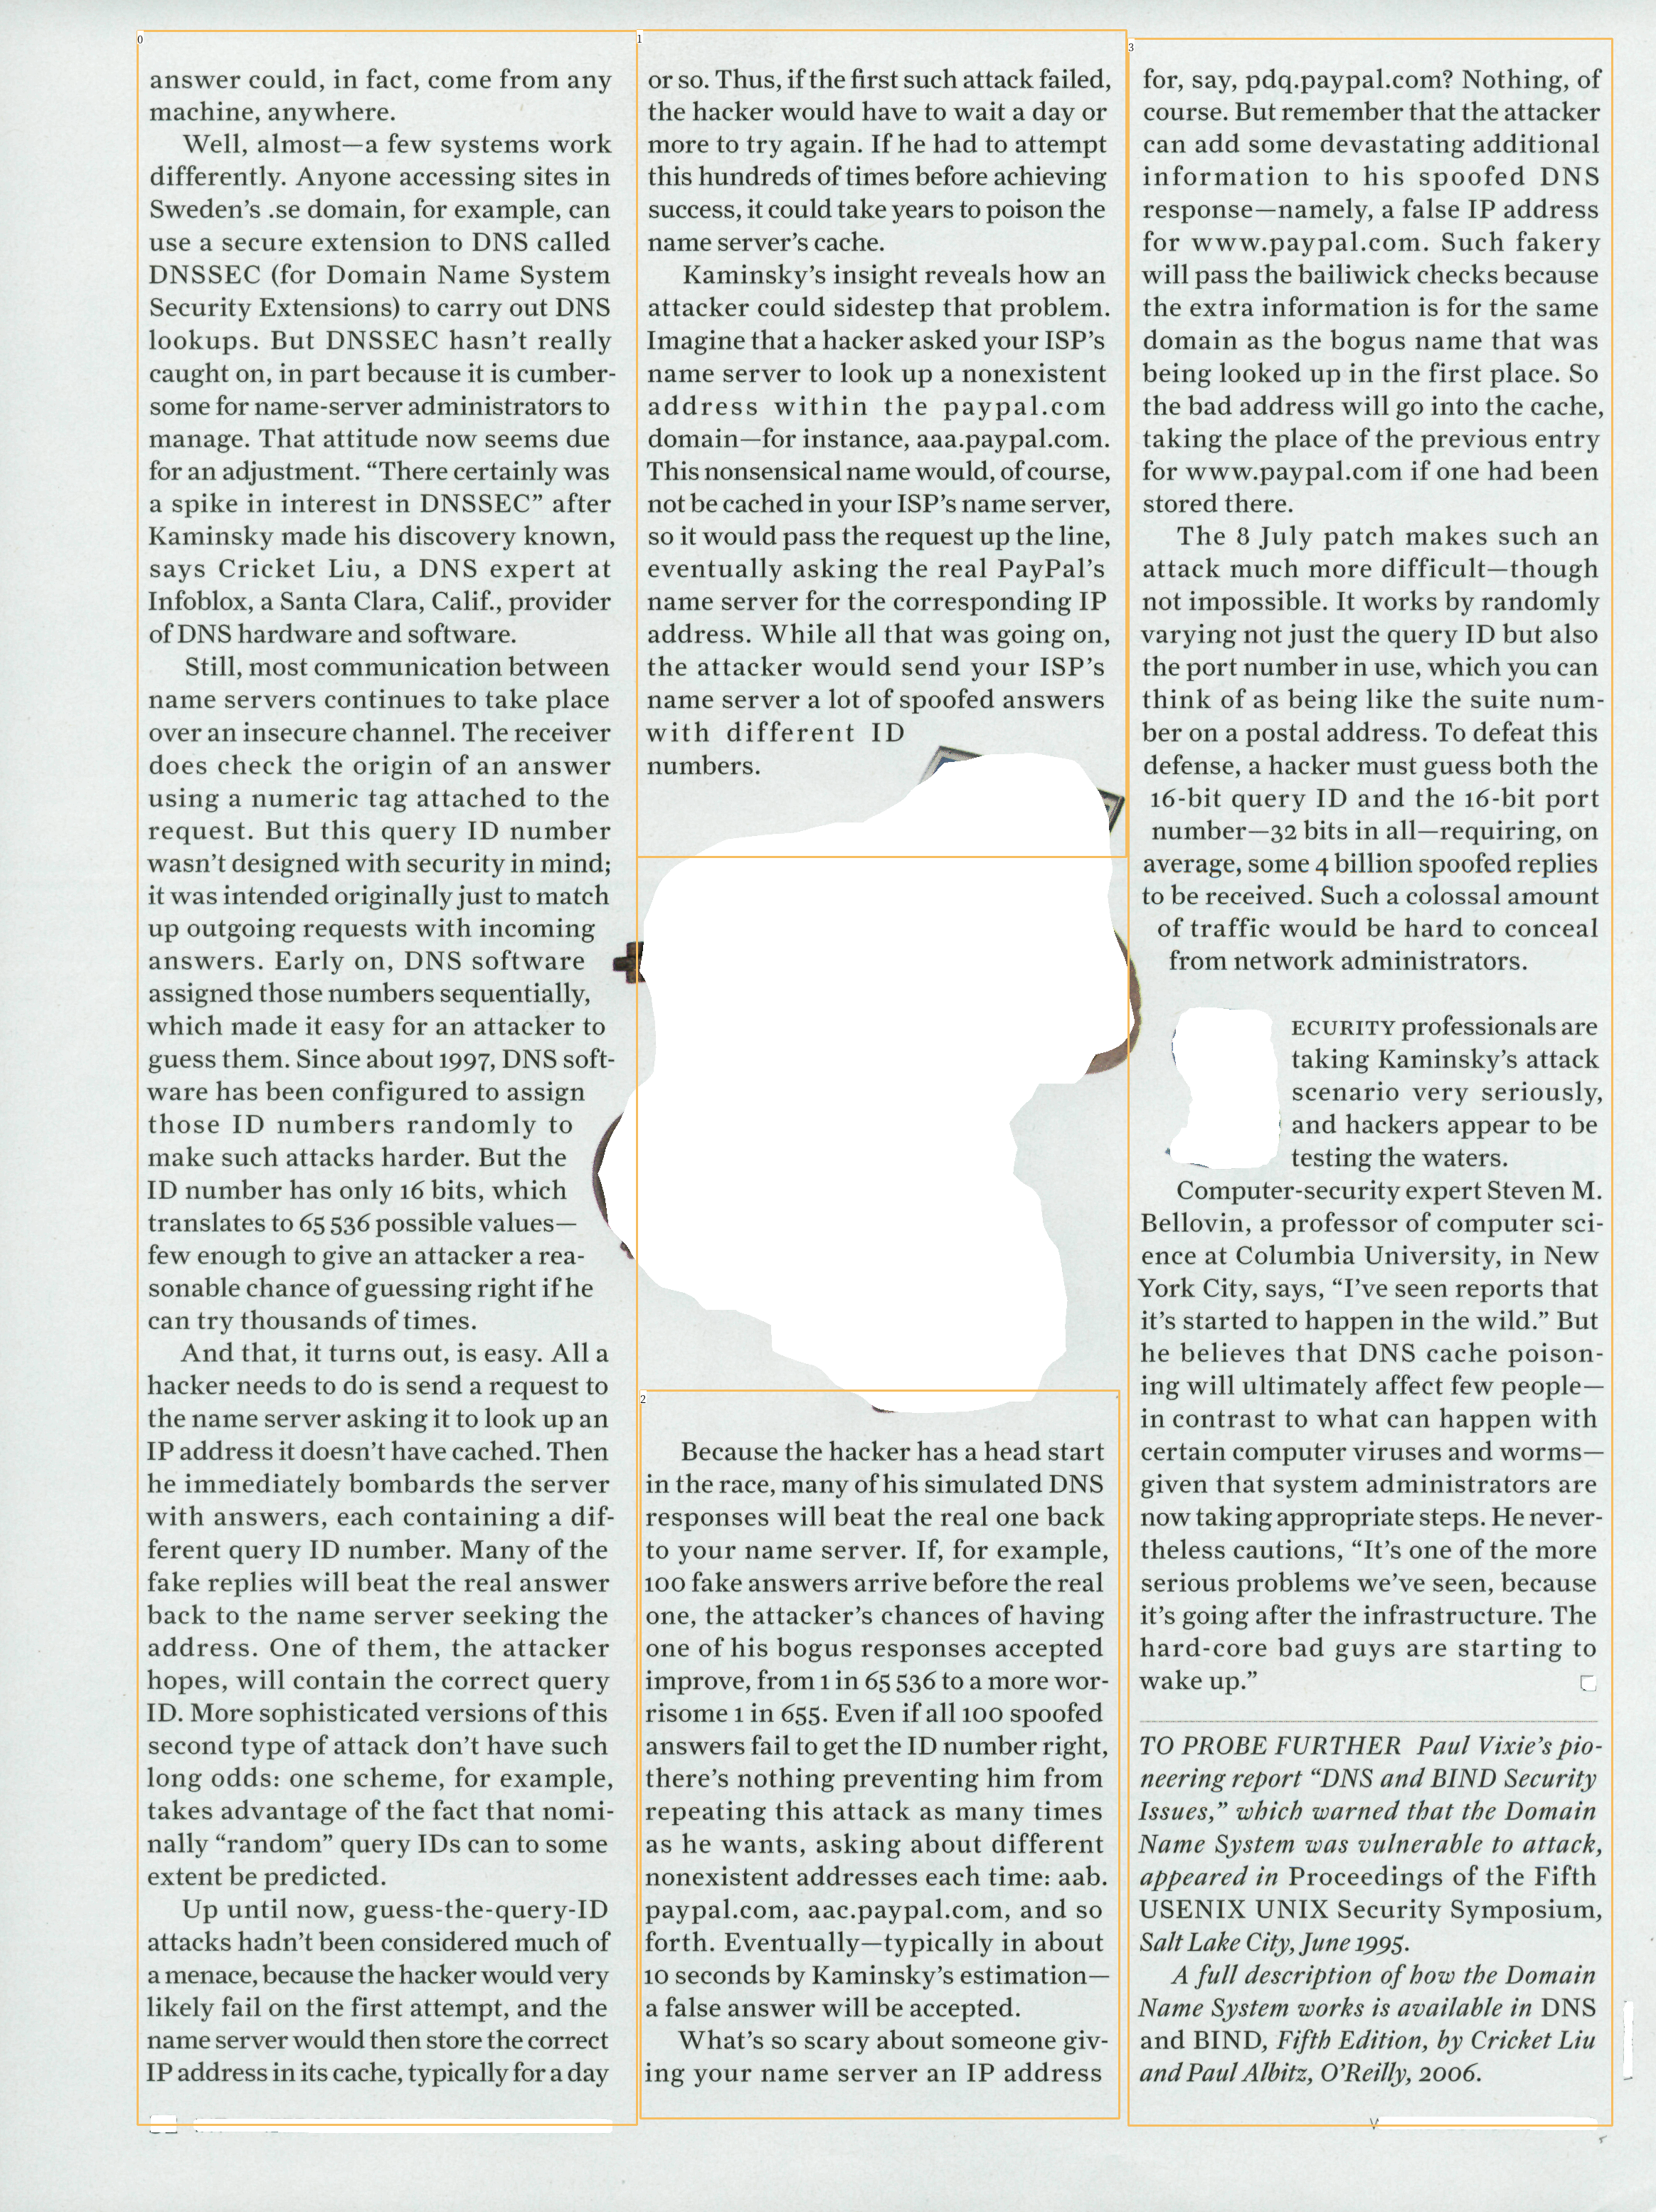

In [6]:
viz.draw_box(image, boxes,
            box_width=3, 
            show_element_id=True)

# OCR Engine
For the OCR engine Tesseract OCR is used, development of the engine has been sponsored by Google since 2006. We make API calls to the OCR for each ordered paragraph box.

In [7]:
arr_im = np.asarray(im)

for block in boxes:
    segment_image = (block.crop_image(arr_im))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)


for txt in boxes.get_texts():
    print(txt, end='\n---\n')

answer could, in fact, come from any
machine, anywhere.

Well, almost—a few systems work
differently. Anyone accessing sites in
Sweden’s .se domain, for example, can
use a secure extension to DNS called
DNSSEC (for Domain Name System
Security Extensions) to carry out DNS
lookups. But DNSSEC hasn’t really
caught on, in part because it is cumber-
some for name-server administrators to
manage. That attitude now seems due
for an adjustment. “There certainly was
a spike in interest in DNSSEC” after
Kaminsky made his discovery known,
says Cricket Liu, a DNS expert at
Infoblox, a Santa Clara, Calif., provider
of DNS hardware and software.

Still, most communication between
name servers continues to take place
over an insecure channel. The receiver
does check the origin of an answer
using a numeric tag attached to the
request. But this query ID number
wasn’t designed with security in mind;
it was intended originally just to match
up outgoing requests with incoming
answers. Early on, DNS softwa